# SIR Model

In [3]:
from sir_model import simulation
from igraph import *
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


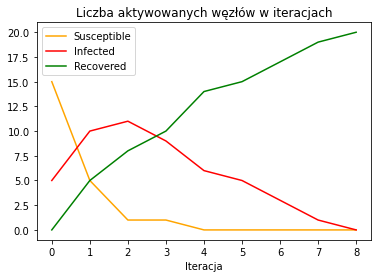

In [19]:
g = Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0.8)
g_history, counts = simulation(g, n=5, m=0.3, b=0.5)
plt.plot(counts[:, 0], label="Susceptible", c='orange')
plt.plot(counts[:, 1], label="Infected", c='red')
plt.plot(counts[:, 2], label="Recovered", c='green')

plt.legend()
plt.title("Liczba aktywowanych węzłów w iteracjach")
plt.xlabel("Iteracja")
plt.savefig("output/zad1_plot.eps")


for idx, g in enumerate(g_history):
    plot(g).save(f"./output/zad1_{idx}.png")

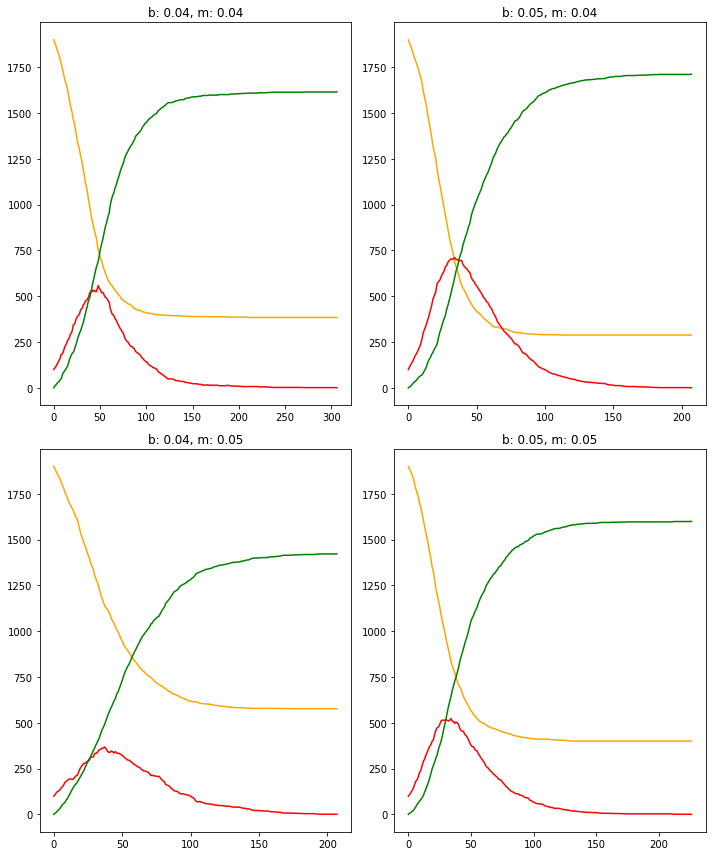

In [29]:
#Przeprowadzenie symulacji dla wartości
#parametrów b np. 0.01 i 0.05 i dwóch
#wartości parametru m np. 0.05, 0.1 (cztery
#kombinacje)

num_nodes = 2000
b_values = [0.04, 0.05]  # prawdopodobienstwo infeckji
m_values = [0.04, 0.05]  # prawdopodobienstwo wyzdrowienia
n = 100  # liczba poczatkowo chorych

fig, axes = plt.subplots(len(m_values), len(b_values), figsize=(10, 12))

idx = 0
for m in m_values:
    for b in b_values:
        g = Graph.Watts_Strogatz(dim=1, size=num_nodes, nei=2, p=0.8)
        g_history, counts = simulation(g, n=100, m=m, b=b)
        
        ax = axes.flat[idx]
        ax.plot(counts[:, 0], label="Susceptible", c='orange')
        ax.plot(counts[:, 1], label="Infected", c='red')
        ax.plot(counts[:, 2], label="Recovered", c='green')
        ax.set_title(f"b: {b}, m: {m}")
        idx += 1
        
fig.tight_layout()
fig.savefig("output/zad2_plot.eps")